# **Import Library**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load dataset California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [3]:
# Inisialisasi model Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=50, random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Membuat prediksi untuk data latih dan data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [4]:
# Menghitung Mean Squared Error (MSE) untuk data latih dan data uji
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Menampilkan hasil MSE
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Training MSE: 9.904697258622977e-32
Test MSE: 0.5265256772490148


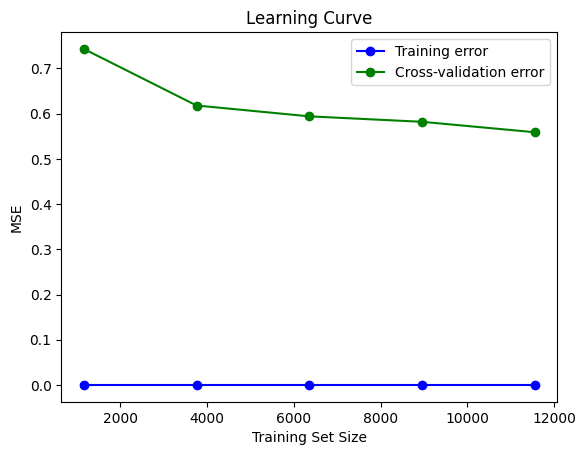

In [5]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Menghitung rata-rata dan standar deviasi
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

**Cross-Validation**

In [6]:
from sklearn.model_selection import cross_val_score

# Menggunakan cross-validation dengan 5 fold
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Menampilkan hasil cross-validation
print(f'Cross-Validation MSE: {-cross_val_scores.mean()}')

Cross-Validation MSE: 0.5562691658603186


**Regularization (Max Depth, Min Samples Split, Min Samples Leaf)**

In [7]:
# Membuat model Decision Tree dengan kedalaman yang lebih kecil
model_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
model_reg.fit(X_train, y_train)

# Evaluasi pada data latih dan uji
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)

# Hitung MSE
train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_reg = mean_squared_error(y_test, y_test_pred_reg)

print(f'Training MSE (After Regularization): {train_mse_reg}')
print(f'Test MSE (After Regularization): {test_mse_reg}')

Training MSE (After Regularization): 0.4928096322147045
Test MSE (After Regularization): 0.5210801561811793


**Pruning (Pruning Manual pada Kedalaman Pohon)**

In [8]:
# Menggunakan ccp_alpha untuk pruning (Cost Complexity Pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Melatih model dengan pruning
model_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alphas[-2])
model_pruned.fit(X_train, y_train)

# Membuat prediksi
y_train_pred_pruned = model_pruned.predict(X_train)
y_test_pred_pruned = model_pruned.predict(X_test)

# Menghitung MSE
train_mse_pruned = mean_squared_error(y_train, y_train_pred_pruned)
test_mse_pruned = mean_squared_error(y_test, y_test_pred_pruned)

print(f'Pruned Model Training MSE: {train_mse_pruned}')
print(f'Pruned Model Test MSE: {test_mse_pruned}')

Pruned Model Training MSE: 0.9189620181001872
Pruned Model Test MSE: 0.9194598144703808


**Data Augmentation**

In [9]:
# Menambahkan sedikit noise ke data sebagai augmentasi
X_train_aug = X_train + np.random.normal(0, 0.1, X_train.shape)

# Melatih ulang model dengan augmented data
model_aug = DecisionTreeRegressor(max_depth=10, random_state=42)
model_aug.fit(X_train_aug, y_train)

# Membuat prediksi
y_train_pred_aug = model_aug.predict(X_train_aug)
y_test_pred_aug = model_aug.predict(X_test)

# Menghitung MSE
train_mse_aug = mean_squared_error(y_train, y_train_pred_aug)
test_mse_aug = mean_squared_error(y_test, y_test_pred_aug)

print(f'Augmented Data Training MSE: {train_mse_aug}')
print(f'Augmented Data Test MSE: {test_mse_aug}')

Augmented Data Training MSE: 0.31258263614227594
Augmented Data Test MSE: 0.5150137600071414


**Dropout**

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi Random Forests dengan n_estimators (jumlah pohon)
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Melatih model
model_rf.fit(X_train, y_train)

# Membuat prediksi
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

# Menghitung MSE
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print(f'Random Forest Training MSE: {train_mse_rf}')
print(f'Random Forest Test MSE: {test_mse_rf}')

Random Forest Training MSE: 0.1694494883912745
Random Forest Test MSE: 0.2944600120852388


**Early Stopping**